## Final Project: The best neighborhood in Pittsburgh

Group name: WEJ

Group members: Weini Xie He, Ethan Guan, Jingtao Zhao 

## Introduction

We believe that the best neighborhood should be the most stable neighborhood, where people can get their basic needs met, feel safe in their surroundings, and have the less traffic. So, we looked at the data that shows the percentage of people with salaries, the crime data, and the traffic data in the neighborhood.

## The Metric:

## Crime Data

The crime data can reflect how safe you neighborhood is. The data I use is just simply the incidentneighborhood. The incidentneighborhood can reflect safty the most.

I use the PittsburghPoliceArrestData.
first I import the data using panda.
then I try to use the dictionary to count how many times do people being arrsted at that place.
then I turn the data into dataset.

In [5]:
import pandas as pd
police = pd.read_csv("PittsburghPoliceArrestData.csv", usecols = ['INCIDENTNEIGHBORHOOD'])
police_dict = {}
i = 0
while i < 58322:
    item = police.loc[i,'INCIDENTNEIGHBORHOOD']
    if item in police_dict:
        police_dict[item]+=1
    else:
        police_dict[item]=1
    i += 1
final = pd.Series(police_dict, name = "place")

Then I sort the value and print it.

In [6]:
final = final.sort_values()[:]
final.head(20)

Mt. Oliver Neighborhood          2
Troy Hill-Herrs Island           6
Mt. Oliver Boro                 18
Central Northside               23
Ridgemont                       32
Regent Square                   32
Chartiers City                  38
Swisshelm Park                  38
New Homestead                   38
St. Clair                       45
East Carnegie                   47
Outside County                  49
Outside State                   57
Summer Hill                     63
Oakwood                         78
Golden Triangle/Civic Arena     83
Hays                            98
Windgap                        103
Fairywood                      108
Mount Oliver                   111
Name: place, dtype: int64

## Visualization

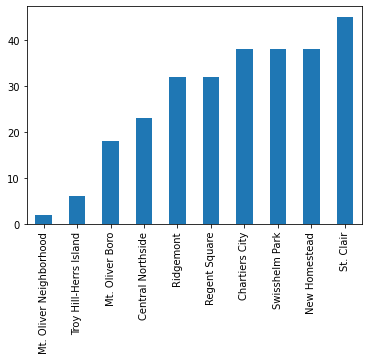

In [7]:
final.sort_values(ascending=True)[:10].plot.bar()

## Salaries data

I decided to look at the percent of people that have wages or salaries as one of the factors to determine the most stable neighborhood. This is an important factor because in order to be stable, people in the neighborhood should be able to obtain their basic needs for living, and a salary is money that people can use to buy their needs. 

In [8]:
#import panda
import pandas as pd
import numpy as np
%matplotlib inline

#open the salary data file
salary = pd.read_csv("salary.csv")
salary.head(5)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,Allegheny Center,1,870.0,93.000000,635.0,91.000000,235.0,59.000000
1,Allegheny West,2,146.0,36.000000,119.0,35.000000,27.0,20.000000
2,Allentown,3,1069.0,132.457540,736.0,140.335313,333.0,97.493590
3,Arlington,4,701.0,104.465305,570.0,106.273233,131.0,45.199558
4,Arlington Heights,5,144.0,59.000000,99.0,60.000000,45.0,30.000000


In [9]:
#shows only the neighborhood name and the total number of people
salary = salary.iloc[0:, 0:3]
#show the neighborhood with the larget number of people with salary
salary.nlargest(10, 'Estimate; Total:',keep='first')

,Neighborhood,Id,Estimate; Total:
68,Shadyside,69,7484.0
77,Squirrel Hill South,78,7211.0
13,Brookline,14,5843.0
9,Bloomfield,10,4571.0
53,Mount Washington,54,4385.0
15,Carrick,16,4301.0
7,Beechview,8,3567.0
36,Greenfield,37,3438.0
76,Squirrel Hill North,77,3370.0
72,South Side Flats,73,3311.0


## Visualization

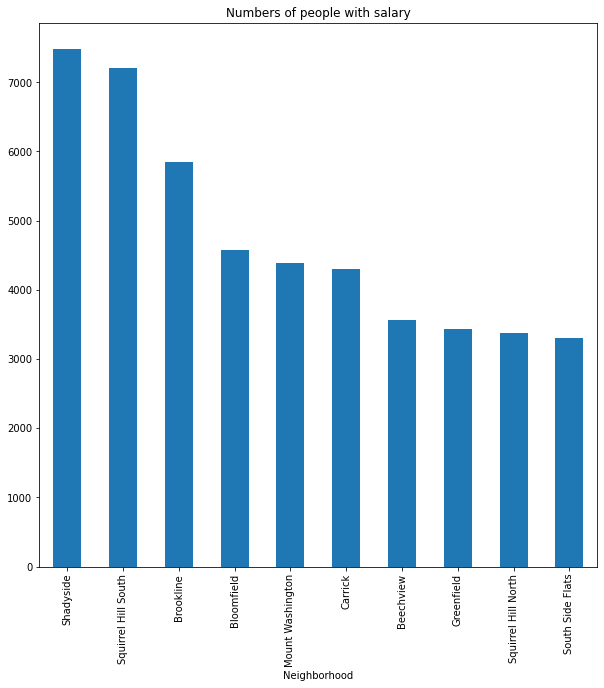

In [10]:
# show only the top 10 neighborhood
salary1 = salary.nlargest(10, 'Estimate; Total:',keep='first')
# make the index to neighborhood names
salary1 = salary1.set_index('Neighborhood')
# create a bar visualization
salary1['Estimate; Total:'].plot(kind="bar", title=("Numbers of people with salary"), figsize=(10,10))

But since the total population of each neighborhood is different, we should look at the percentage of people with salaries in the neighborhood for a more accurate list.

In [11]:
#open the total-population data file
population = pd.read_csv("total-population.csv")
#show the first 10 datas
population.head(5)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411.0,196.000000
1,Allegheny West,2,343.0,96.000000
2,Allentown,3,2558.0,449.773276
3,Arlington,4,1852.0,348.188168
4,Arlington Heights,5,272.0,126.000000


In [12]:
#shows only the neighborhood name and the total number of people
population = population.iloc[0:, 0:3]
#show the neighborhood with largest population
population.nlargest(10, 'Estimate; Total',keep='first')

,Neighborhood,Id,Estimate; Total
77,Squirrel Hill South,78,16042.0
68,Shadyside,69,13562.0
13,Brookline,14,13160.0
76,Squirrel Hill North,77,11336.0
15,Carrick,16,10122.0
56,North Oakland,57,9602.0
53,Mount Washington,54,8743.0
9,Bloomfield,10,8669.0
7,Beechview,8,8078.0
36,Greenfield,37,7690.0


## Visualization

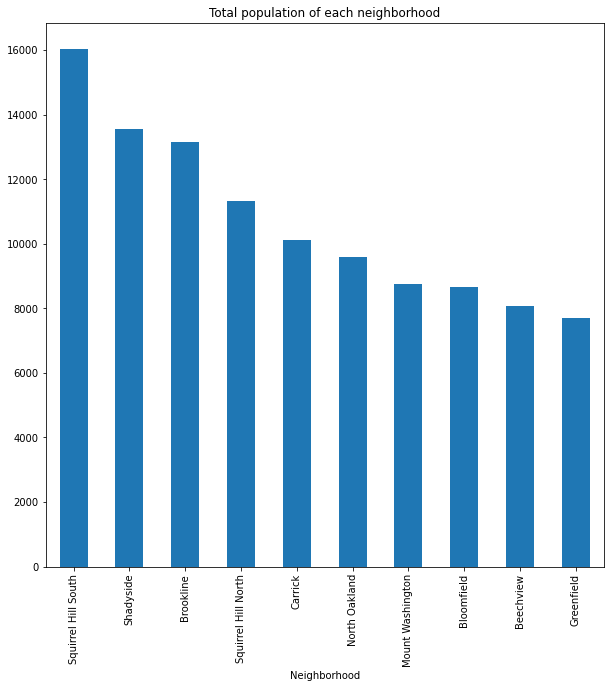

In [13]:
#shows only the top 10 neighborhood
population1 = population.nlargest(10, 'Estimate; Total',keep='first')
# make the index to neighborhood names
population1 = population1.set_index('Neighborhood')
# create a bar visualization
population1['Estimate; Total'].plot(kind="bar", title=("Total population of each neighborhood"), figsize=(10,10))

Now that we have both the neighborhood with numbers of people with salary data and the top 10 neighborhood with the largest population data, we can calculate the percentage of people with salary in the neighborhood.

In [24]:
#calculate the percentage of each person with salary in the neighborhood
#create a new dataframe to store needed datas
percentage = pd.DataFrame()
#use the data from the salary data file and the data from the total population file
#create new columns
percentage["Neighborhood"] = population["Neighborhood"]
percentage['Number of people with salary']= salary['Estimate; Total:']
percentage['Total population']= population['Estimate; Total']

#calculate the percentage by dividing the total population by the number of people with salary 
percentage['Percent']= (percentage['Number of people with salary']/percentage['Total population'])*100
#show the neighborhood with the larget percent of each person with salary
final1 = percentage.nlargest(10, 'Percent',keep='first')
final1

,Neighborhood,Number of people with salary,Total population,Percent
21,Chateau,3.0,3.0,100.000000
57,North Shore,154.0,205.0,75.121951
80,Strip District,520.0,747.0,69.611780
71,South Shore,8.0,12.0,66.666667
25,East Allegheny,1302.0,2095.0,62.147971
0,Allegheny Center,870.0,1411.0,61.658398
33,Friendship,1074.0,1840.0,58.369565
64,Point Breeze North,996.0,1732.0,57.505774
68,Shadyside,7484.0,13562.0,55.183601
6,Bedford Dwellings,723.0,1349.0,53.595256


Top neighborhoods with the largest percentage:
As you can see the top 10 neighborhoods with the highest percent of people with salaries are Chateau, North Shore, Strip District, South Shore, East Alleghney, Allegheny Center, Friendship, Point Breeze North, Shadyside, and Bedford Dwellings.

## Traffic Data


In [15]:
#import panda
import pandas as pd
import numpy as np
%matplotlib inline

In [16]:
#open the average daily car traffic data file
cartraffic = pd.read_csv("car_traffic.csv")
#show the first 10 datas
cartraffic.head(10)


,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15
5,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,...,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
6,1047444948,17,1.366891e+09,2018-10-18,NaN,NaN,NaN,NaN,NaN,25.0,...,-79.942273,40.446282,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26
7,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,...,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
8,1073440033,156,1.736165e+09,2017-07-28,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.960385,40.438983,Central Oakland,3.0,4.0,42003040500,3.0,4.0,4.0,2-14
9,1092885547,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-79.920958,40.467294,East Liberty,9.0,11.0,42003111300,2.0,11.0,5.0,3-8


In [17]:
daily_car_traffic = pd.DataFrame()
daily_car_traffic['average_daily_car_traffic'] = cartraffic['average_daily_car_traffic']
daily_car_traffic['neighborhood_name'] = cartraffic['neighborhood']
daily_car_traffic.head(10)

,average_daily_car_traffic,neighborhood_name
0,4949.0,Polish Hill
1,NaN,Central Lawrenceville
2,NaN,Windgap
3,2741.0,Squirrel Hill South
4,NaN,Perry North
5,1046.0,Central Northside
6,NaN,Squirrel Hill North
7,3015.0,Polish Hill
8,NaN,Central Oakland
9,NaN,East Liberty


In [26]:
#show the neighborhood with smallest average car traffic number
traffic = daily_car_traffic.nsmallest(10, 'average_daily_car_traffic', keep= 'first')
traffic

,average_daily_car_traffic,neighborhood_name
182,23.0,Central Northside
251,58.0,East Liberty
307,63.0,Spring Hill-City View
247,77.0,Bloomfield
244,79.0,Bloomfield
258,79.0,Highland Park
321,109.0,Marshall-Shadeland
310,115.0,South Side Flats
318,126.0,Lincoln Place
158,131.0,Windgap


## Visualization

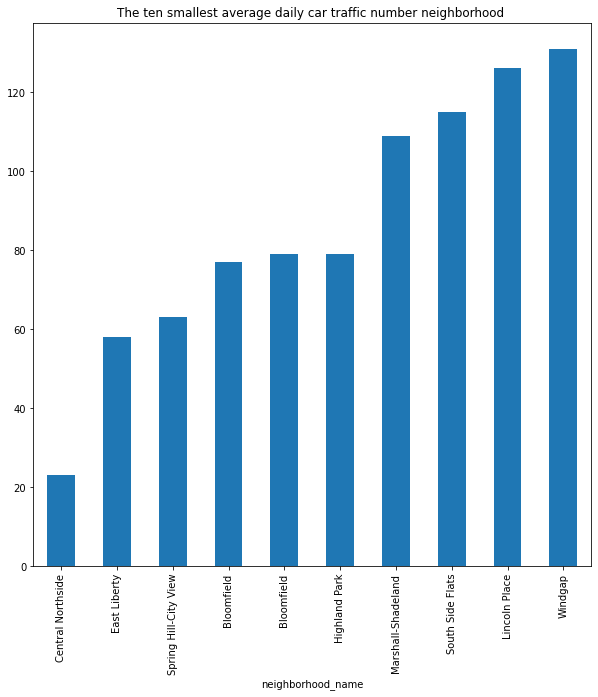

In [19]:
daily_car_traffic1 = daily_car_traffic.nsmallest(10, 'average_daily_car_traffic', keep= 'first')
#make the index to neighborhood names
daily_car_traffic1 = daily_car_traffic1.set_index('neighborhood_name')
# create a bar visualization
daily_car_traffic1['average_daily_car_traffic'].plot(kind="bar", title=("The ten smallest average daily car traffic number neighborhood "), figsize=(10,10))

Conclusion:
The ten neighborhood that has the smallest average car traffic number is Central Northside, East Liberty, Spring Hill-City View, Bloomfield(two data), Highland Park, Marshall-Shadeland, South Side Flats, Lincoln Place, and Windgap. These neighborhood are the top ten smallest.

## Conclusion

To find the best neighborhood through the three submetrics, we decided to look for the neighborhood that overlaps. 

In [20]:
mylist = ["Mt. Oliver Neighborhood","Troy Hill-Herrs Island","Mt. Oliver Boro", "Central Northside", "Ridgemont", "Regent Square", "Chartiers City", "Swisshelm Park", "New Homestead", "St. Clair", "East Carnegie", "Outside County", "Outside State", "Summer Hill", "Oakwood", "Golden Triangle/Civic Arena",
            "Hays", "Windgap", "Fairywood", "Mount Oliver", "Bloomfield", "Squill Hill North"]
    

In [28]:
finaldict = []
count3 = 0
while count3<20:
        for item1 in final1['Neighborhood']:
            for item1 in traffic['neighborhood_name']:
                if item1 == mylist[count3]:
                    finaldict.append(item1)
        count3+=1
finaldict[1]

'Central Northside'

The neighborhood that overlapped the most in our findings was Central Northside and was consistently ranked at the top using our list. Our data priority is police over salary and salary over traffic.

## The best neighborhood in Pittsburgh is Central Northside.

## Reflections

Jingtao's reflection: Base on my data Central Northside is in my top 20, and it also match up in my other two groupmate's data. So, Central Northside base on our data are clearly the best neighborhood.

Weini's reflection: Our conclusion shows that the Central Northside is the best neighborhood. I haven’t been to the Central Northside, so I don’t really know how it was. Therefore, I will think that it is the best neighborhood because of the conclusion we reached, and looking at the pictures, I think it's a pretty good place to live.

Ethan's reflection: Based on my data and others' data, Central Northside is the best neighborhood, because it is in my top 20 list, and so do others. Compare to other neighborhood, Central Norhside is the best neighborhood.